## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Import Necessary Libraries**

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [11]:
df_fitness=pd.read_excel("fitness_data.xlsx")
df_fitness.head()
# df_fitness.shape

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [3]:
df_fitness.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [5]:
# Calculate the range of "steps_taken" for the entire week
steps_range=df_fitness["steps_taken"].max()-df_fitness["steps_taken"].min()

# Calculate the range of "calories_burned" for the entire week

cal_range=df_fitness["calories_burned"].max()-df_fitness["calories_burned"].min()

# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
sleep_Q1,sleep_Q3=df_fitness["sleep_duration(hours)"].quantile([0.25,0.75])
sleep_IQR=sleep_Q3-sleep_Q1

# Calculate the IQR for "water_intake(ounces)"
water_Q1,water_Q3=df_fitness["water_intake(ounces)"].quantile([0.25,0.75])
water_IQR=water_Q3-water_Q1

# Print the results

print(steps_range)
print(cal_range)
print(sleep_IQR)
print(water_IQR)


7000
1800
0.5
20.0


## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

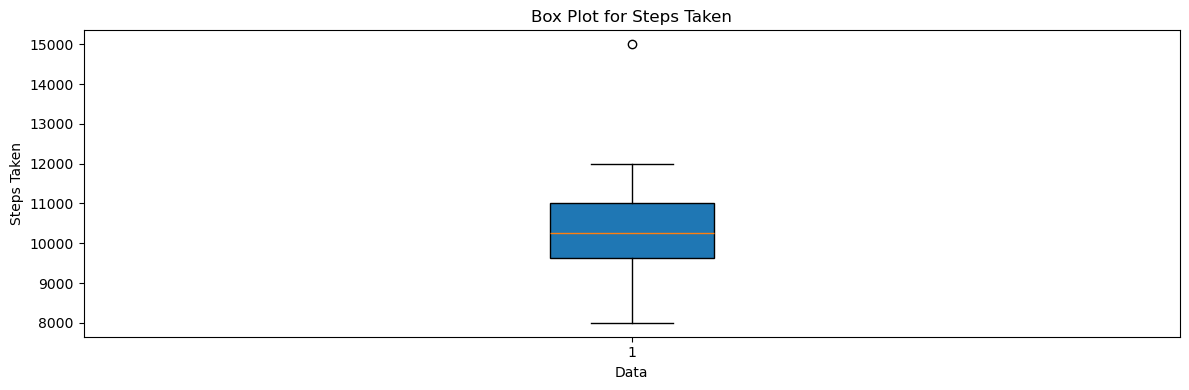

In [15]:
plt.figure(figsize=(12,4))
plt.boxplot(df_fitness["steps_taken"],vert=True,patch_artist=True)
plt.xlabel("Data")
plt.ylabel("Steps Taken")
plt.title("Box Plot for Steps Taken")
plt.tight_layout()
plt.show()

#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [20]:
#defininig the function
def get_outliers(df):
    Q1,Q3=df.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    higher=Q3+1.5*IQR

    return lower,higher

get_outliers(df_fitness["sleep_duration(hours)"])

(6.25, 8.25)

In [22]:
#get the lower and upper limits
lower,upper=get_outliers(df_fitness["sleep_duration(hours)"])
lower,upper

(6.25, 8.25)

In [23]:
# Identify and label outliers
outliers=df_fitness[(df_fitness["sleep_duration(hours)"]<lower) | (df_fitness["sleep_duration(hours)"]>higher)]

# Display the outliers
outliers


,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75


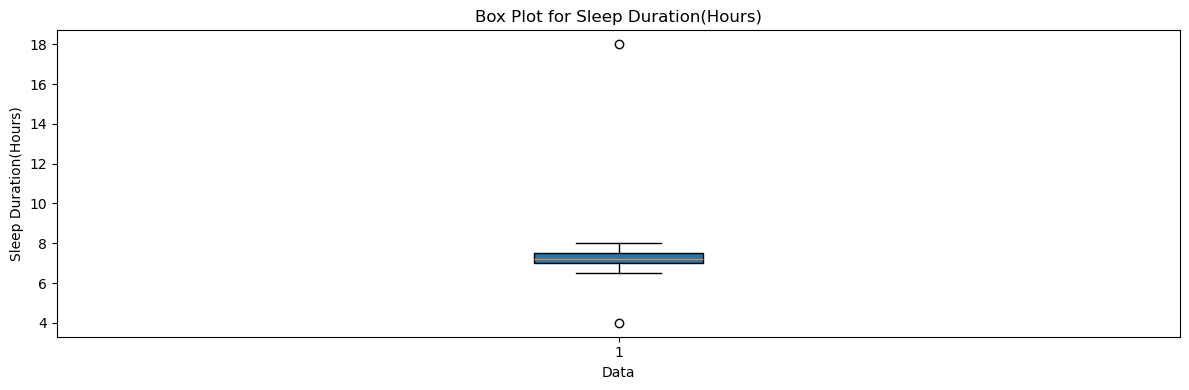

In [24]:
plt.figure(figsize=(12,4))
plt.boxplot(df_fitness["sleep_duration(hours)"],vert=True,patch_artist=True)
plt.xlabel("Data")
plt.ylabel("Sleep Duration(Hours)")
plt.title("Box Plot for Sleep Duration(Hours)")
plt.tight_layout()
plt.show()